In [18]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
from PIL import Image
import math

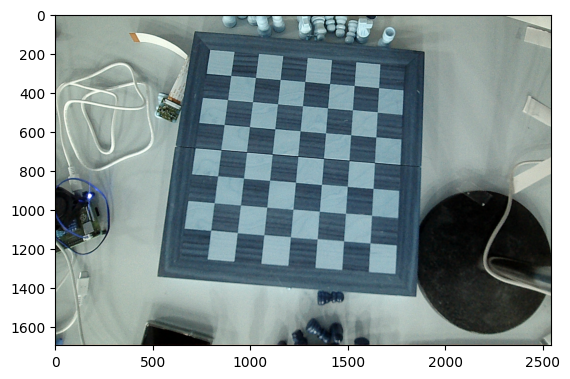

In [4]:
img = cv.imread("empty_test.jpg")
plt.imshow(img)
# (thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
lwr = np.array([0, 0, 143])
upr = np.array([179, 61, 252])
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# msk = cv2.inRange(hsv, lwr, upr)
# plt.imshow(hsv)


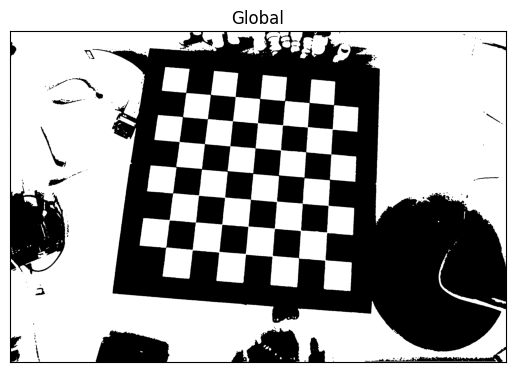

In [125]:
image = cv.imread('empty_test.jpg', cv.IMREAD_GRAYSCALE)
img = image.copy()
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

i=1
plt.imshow(th1,'gray')
plt.title("Global")
plt.xticks([]),plt.yticks([])
plt.show()
# plt.imshow(th1)

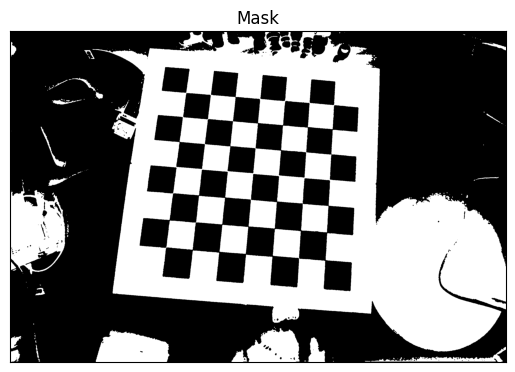

In [126]:
krn = cv.getStructuringElement(cv.MORPH_RECT, (50, 30))
dlt = cv.dilate(th1, krn, iterations=5)
res = 255 - cv.bitwise_and(dlt, th1)
plt.imshow(res,'gray')
plt.title("Mask")
plt.xticks([]),plt.yticks([])
plt.show()

True


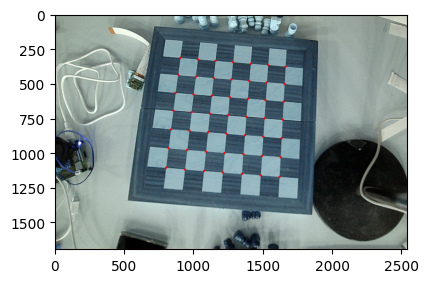

In [192]:
temp = cv.imread('empty_test.jpg')
res = np.uint8(res)
ret, corners = cv.findChessboardCorners(res, (7, 7),
                                         flags=cv.CALIB_CB_ADAPTIVE_THRESH +
                                               cv.CALIB_CB_FAST_CHECK +
                                               cv.CALIB_CB_NORMALIZE_IMAGE)
print(ret)
if ret:
#     print(corners)
    # fnl = cv.drawChessboardCorners(img, (7, 7), corners, ret)
    for corner in corners:
        coord = (int(corner[0][0]), int(corner[0][1]))
        cv.circle(temp, center=coord,radius=5,color=(255,0,0),thickness=5)
# else:
#     print("No Checkerboard Found")

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(temp)
plt.show()

In [46]:
# Buggy
sorted_points=[]

top = -1
pos = -1
for index, point in enumerate(corners):
    x,y = point[0]
    if(x**2+y**2>top):
        top = x**2+y**2
        pos = index
poi = corners[pos]
#Find all pois
pois = []
corners_copy = np.ndarray.tolist(corners).copy()
for index, point in enumerate(corners_copy):
    corners_copy[index] = (index,point[0][0],abs(point[0][1] - poi[0][1]))
corners_copy.sort(key = lambda a:(a[2],a[1]))

for i in range(7):
    pois.append(np.ndarray.tolist(corners[corners_copy[i][0]][0]))
pois.sort(reverse=True)


for poi in pois:
    col = []
    corners_copy = np.ndarray.tolist(corners).copy()
    for index, point in enumerate(corners_copy):
        corners_copy[index] = (index,abs(point[0][0] - poi[0]),point[0][1])
    corners_copy.sort(key = lambda a:(a[1],a[2]))

    for i in range(0, 7):
        col.append(np.ndarray.tolist(corners[corners_copy[i][0]][0]))
    col.sort(key = lambda a:(a[1],a[0]),reverse=True)

    sorted_points.extend(col)

len(sorted_points)

49

In [193]:
sorted_points=[]

#Find point furthest from origin
top = -1
pos = -1
for index, point in enumerate(corners):
    x,y = point[0]
    if(x**2+y**2>top):
        top = x**2+y**2
        pos = index
furthest = corners[pos]

corners = corners.squeeze()
#Update coordinate system
corners = furthest - corners 

#Sort by x
temp = np.array(sorted(corners, key=lambda tup: tup[0]))

for col in range(7):
    s = temp[col*7:col*7+7]
    sorted_points.extend(sorted(s, key=lambda tup: tup[1]))
sorted_points = np.array(sorted_points)

#Revert coordinate system
sorted_points = furthest - sorted_points
sorted_points

array([[1616.5    , 1174.     ],
       [1625.     , 1032.     ],
       [1631.462  ,  895.9282 ],
       [1639.0005 ,  761.99994],
       [1646.5    ,  631.5    ],
       [1653.     ,  504.     ],
       [1660.5    ,  379.     ],
       [1481.     , 1163.     ],
       [1490.5    , 1022.     ],
       [1499.5023 ,  883.1208 ],
       [1509.5    ,  751.     ],
       [1515.7024 ,  621.0644 ],
       [1524.5837 ,  493.73218],
       [1534.9999 ,  367.49976],
       [1346.     , 1152.5    ],
       [1357.     , 1011.5    ],
       [1368.     ,  873.5    ],
       [1377.9998 ,  740.49963],
       [1389.     ,  610.5    ],
       [1398.9998 ,  482.50024],
       [1409.     ,  358.     ],
       [1209.     , 1142.     ],
       [1219.7979 , 1002.02313],
       [1234.0316 ,  862.4251 ],
       [1246.5    ,  729.     ],
       [1258.2897 ,  599.17426],
       [1270.5    ,  471.5    ],
       [1282.     ,  347.5    ],
       [1072.5    , 1131.5    ],
       [1088.1135 ,  992.13745],
       [11

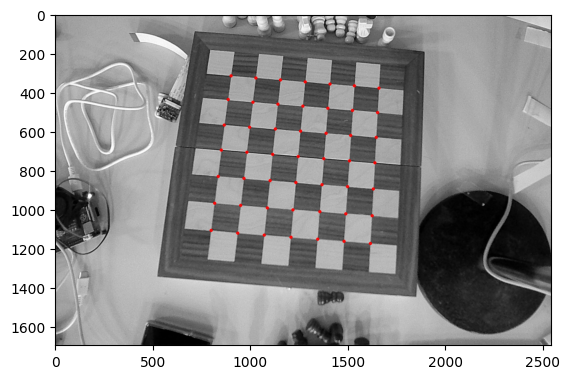

In [189]:
test = cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB)
i = 0
for corner in sorted_points:
        coord = (int(corner[0]), int(corner[1]))
        cv.circle(test, center=coord,radius=5,color=(255,0,0),thickness=5)
        i+=1
        if i>49: break
plt.imshow(test)

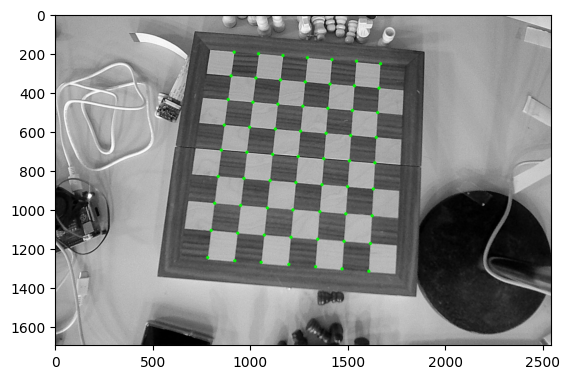

In [194]:
sorted_points = sorted_points.tolist()
newPoints=[]
sorted_points_copy = []
for col in range(7):
    coloumn = sorted_points[col*7:(col+1)*7]
 
    p1 = coloumn[0]
    p2 = coloumn[1]

    p3 = coloumn[-1]
    p4 = coloumn[-2]

    distances = (p1[0]-p2[0], abs(p1[1]- p2[1]))
    new_p1 = [p1[0]+distances[0], p1[1]+distances[1]]

    newPoints.append([new_p1])
    coloumn.insert(0, new_p1)

    distances = (p3[0]-p4[0], abs(p3[1]- p4[1]))
    new_p1 = [p3[0]+distances[0], p3[1]-distances[1]]

    newPoints.append([new_p1])
    coloumn.append( new_p1)


    sorted_points_copy.extend(coloumn)

sorted_points = sorted_points_copy.copy()

test = cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB)
for corner in sorted_points:
    coord = (int(corner[0]), int(corner[1]))
    cv.circle(test, center=coord,radius=5,color=(0,255,0),thickness=5)


plt.imshow(test)


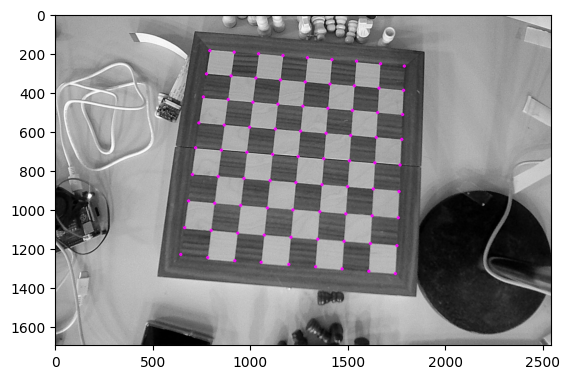

In [195]:
#Doing the extra rows
newPoints=[]
coloumn1 = sorted_points[0:9]
coloumn2 = sorted_points[9:18]

coloumn3 = sorted_points[45:54]
coloumn4 = sorted_points[54:63]

coloumn_first=[]
coloumn_last=[]

for i in range(9):
    p1 = coloumn1[i]
    p2 = coloumn2[i]

    p3 = coloumn3[i]
    p4 = coloumn4[i]

    distances = (abs(p1[0]-p2[0]), p1[1]- p2[1])
    new_p1 = [p1[0]+distances[0], p1[1]+distances[1]]

    newPoints.append(new_p1)
    coloumn_first.append(new_p1)


    distances = (abs(p3[0]-p4[0]), p4[1]- p3[1])
    new_p1 = [p4[0]-distances[0], p4[1]+distances[1]]

    newPoints.append(new_p1)
    coloumn_last.append(new_p1)


coloumn_first.extend(sorted_points)
coloumn_first.extend(coloumn_last)


sorted_points = coloumn_first.copy()

test = cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB)
for corner in sorted_points:
    coord = (int(corner[0]), int(corner[1]))
    cv.circle(test, center=coord,radius=5,color=(255,0,255),thickness=5)


plt.imshow(test)


In [12]:
#Make dictionary
boxes={}
c = ord('A') - 1
for col in range(8):
    c+=1
    for row in range(8):
        boxes[chr(c)+str(row+1)] = (sorted_points[col*9+1 + 9 + row], sorted_points[col*9+1+row],sorted_points[col*9+9+row], sorted_points[col*9+row])
boxes

{'A1': ([1616.5, 1174.0],
  [1752.0, 1185.0],
  [1608.0, 1316.0],
  [1744.5, 1328.0]),
 'A2': ([1625.0, 1032.0],
  [1759.5, 1042.0],
  [1616.5, 1174.0],
  [1752.0, 1185.0]),
 'A3': ([1631.4620361328125, 895.92822265625],
  [1763.4217529296875, 908.7356567382812],
  [1625.0, 1032.0],
  [1759.5, 1042.0]),
 'A4': ([1639.00048828125, 761.9999389648438],
  [1768.5009765625, 772.9998779296875],
  [1631.4620361328125, 895.92822265625],
  [1763.4217529296875, 908.7356567382812]),
 'A5': ([1646.5, 631.5],
  [1777.297607421875, 641.9356079101562],
  [1639.00048828125, 761.9999389648438],
  [1768.5009765625, 772.9998779296875]),
 'A6': ([1653.0, 504.0],
  [1781.416259765625, 514.267822265625],
  [1646.5, 631.5],
  [1777.297607421875, 641.9356079101562]),
 'A7': ([1660.5, 379.0],
  [1786.0001220703125, 390.500244140625],
  [1653.0, 504.0],
  [1781.416259765625, 514.267822265625]),
 'A8': ([1668.0, 254.0],
  [1790.583984375, 266.732666015625],
  [1660.5, 379.0],
  [1786.0001220703125, 390.500244140

In [103]:
# test = cv.cvtColor(img.copy(), cv.COLOR_BGR2RGB)
# corner = corners
# boxes = {
#     "1,1": (corner[0],corner[1],corner[7],corner[8]),
#     "1,2":(corner[1],corner[2],corner[8],corner[9]),
#     "1,3":(corner[2],corner[3],corner[9],corner[10]),
#     "1,4":(corner[3],corner[4],corner[10],corner[11]),
#     "1,5":(corner[4],corner[5],corner[11],corner[12]),
#     "1,6":(corner[5],corner[6],corner[12],corner[13]),
#     "2,1":(corner[7],corner[8],corner[14],corner[15]),
#     "2,2":(corner[8],corner[9],corner[15],corner[16]),
#     "2,3":(corner[9],corner[10],corner[16],corner[17]),
#     "2,4":(corner[10],corner[11],corner[17],corner[18]),
#     "2,5":(corner[11],corner[12],corner[18],corner[19]),
#     "2,6":(corner[12],corner[13],corner[19],corner[20]),
#     "3,1":(corner[14],corner[15],corner[21],corner[22]),
#     "3,2":(corner[15],corner[16],corner[22],corner[23]),
#     "3,3":(corner[16],corner[17],corner[23],corner[24]),
#     "3,4":(corner[17],corner[18],corner[24],corner[25]),
#     "3,5":(corner[18],corner[19],corner[25],corner[26]),
#     "3,6":(corner[19],corner[20],corner[26],corner[27]),
#     "4,1":(corner[21],corner[22],corner[28],corner[29]),
#     "4,2":(corner[22],corner[23],corner[29],corner[30]),
#     "4,3":(corner[23],corner[24],corner[30],corner[31]),
#     "4,4":(corner[24],corner[25],corner[31],corner[32]),
#     "4,5":(corner[25],corner[26],corner[32],corner[33]),
#     "4,6":(corner[26],corner[27],corner[33],corner[34]),
#     "5,1":(corner[28],corner[29],corner[35],corner[36]),
#     "5,2":(corner[29],corner[30],corner[36],corner[37]),
#     "5,3":(corner[30],corner[31],corner[37],corner[38]),
#     "5,4":(corner[32],corner[32],corner[38],corner[39]),
#     "5,5":(corner[33],corner[33],corner[39],corner[40]),
#     "5,6":(corner[33],corner[34],corner[40],corner[41]),
#     "6,1":(corner[35],corner[36],corner[42],corner[43]),
#     "6,2":(corner[36],corner[37],corner[43],corner[44]),
#     "6,3":(corner[37],corner[38],corner[44],corner[45]),
#     "6,4":(corner[38],corner[39],corner[45],corner[46]),
#     "6,5":(corner[39],corner[40],corner[46],corner[47]),
#     "6,6":(corner[40],corner[41],corner[47],corner[48]),
# }
# plt.imshow(test)
# print(boxes)

4084943


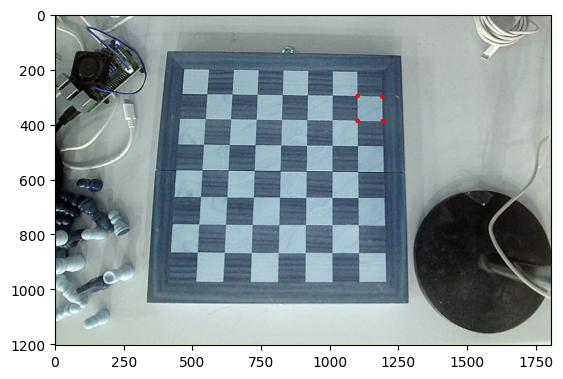

In [138]:
def tileSum(bound, img):
    coords=[]
    for i in bound:
        coord = (int(i[0]),int(i[1]))
        coords.append(coord)
        cv.circle(img, center=coord,radius=5,color=(255,0,0),thickness=5)

    # print(coords[0][0], coords[3][0] , coords[0][1], coords[3][1])
    bound1 = min(coords[0][0],coords[3][0])
    bound2 = max(coords[0][0],coords[3][0])
    bound3 = min(coords[0][1],coords[3][1])
    bound4 = max(coords[0][1],coords[3][1])
    tile = img[bound3:bound4, bound1:bound2 ]
    
    return tile.sum()
test = cv.imread("../testBoardImages/empty2.jpg")
test_ = test.copy()
print(tileSum(boxes["A7"],test_))
plt.imshow(test_)

In [140]:
def findTop2(boxes,img):
    values=[]
    for box in boxes:
        sum = tileSum(boxes[box],img) 
        values.append((sum, box))
    values.sort(reverse=True)
    print(values)
    return values[0:2]

# findTop2(boxes, test)

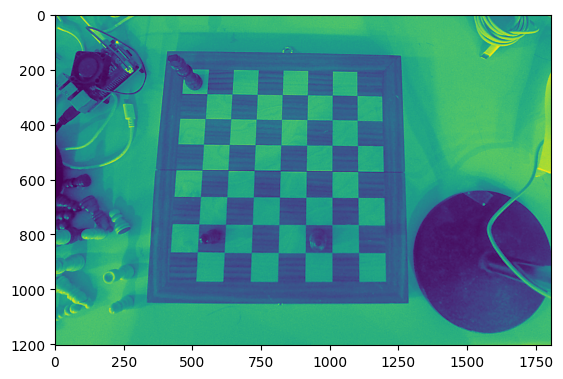

In [147]:
move1 = cv.imread("../testBoardImages/move1.jpg",cv.IMREAD_GRAYSCALE)
move2 = cv.imread("../testBoardImages/move2.jpg", cv.IMREAD_GRAYSCALE)

plt.imshow(move2)

[[29 31 28 ... 37 40 40]
 [21 21 25 ... 43 41 41]
 [21 11 16 ... 43 40 40]
 ...
 [31 29 28 ... 42 39 36]
 [30 28 28 ... 26 26 25]
 [28 27 28 ... 10 11 11]]


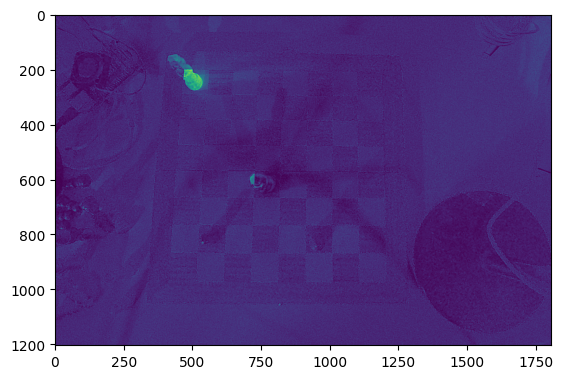

In [148]:
newImg = cv.absdiff(move1,move2)
print(newImg)
plt.imshow(newImg)

In [149]:
findTop2(boxes, newImg)

[(777577, 'H8'), (376979, 'B2'), (361000, 'D2'), (358459, 'C1'), (346904, 'F2'), (346043, 'G1'), (343186, 'E1'), (329611, 'A3'), (327063, 'C3'), (324870, 'H2'), (324074, 'G3'), (319491, 'F4'), (313482, 'F8'), (311758, 'A1'), (306644, 'E3'), (298538, 'F1'), (293752, 'B6'), (290217, 'A5'), (286368, 'G8'), (283299, 'D1'), (282314, 'D3'), (281292, 'B5'), (279865, 'H1'), (279545, 'G7'), (279218, 'B4'), (273092, 'A7'), (272962, 'E2'), (271312, 'B1'), (269482, 'C5'), (268246, 'H3'), (266289, 'D8'), (265335, 'A6'), (262554, 'C2'), (258558, 'A4'), (257738, 'F3'), (255537, 'F7'), (254202, 'B8'), (252940, 'G2'), (252468, 'A8'), (251619, 'A2'), (248156, 'H5'), (243984, 'H7'), (241753, 'E8'), (241047, 'E7'), (239991, 'B7'), (239975, 'H6'), (237160, 'G4'), (232589, 'D6'), (231337, 'C6'), (230954, 'H4'), (226861, 'G6'), (223098, 'F6'), (221195, 'D4'), (217738, 'B3'), (215980, 'D5'), (215447, 'G5'), (213511, 'D7'), (206485, 'C8'), (198525, 'C7'), (193616, 'C4'), (192027, 'E6'), (189992, 'E5'), (189486

[(777577, 'H8'), (376979, 'B2')]

1177702


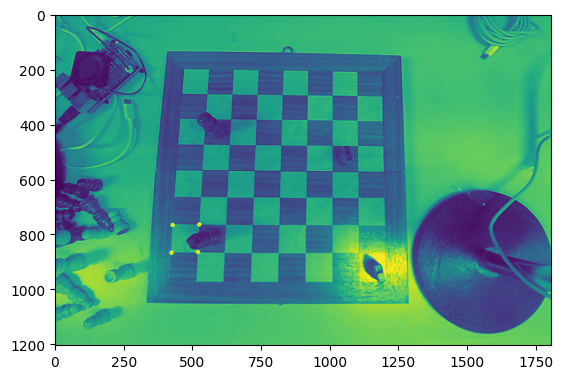

In [146]:
test_ = move1.copy()
print(tileSum(boxes["H2"],test_))
plt.imshow(test_)